# 1. Small-world network example

before you start read this short (2.5 pages) paper

"Emergence of Scaling in Random Networks", Albert Laszlo Barabasi and Reka Albert, https://web.archive.org/web/20120417112354/http://www.nd.edu/~networks/Publication%20Categories/03%20Journal%20Articles/Physics/EmergenceRandom_Science%20286,%20509-512%20(1999).pdf


In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fname = Path('./itas_2009-2017_v8.xls')
itas_all = pd.read_excel(fname)

itas_all.head()

,title,year,author,Name,Surname,author_id_new,Gender
0,Improving Energy-awareness in Selective Reprog...,2016,Hadeel Abdah,Hadeel,Abdah,Abdah Hadeel,Male
1,PIFA Antenna Design for Fourth Generation Wire...,2017,Amin Al-Ka'bi,Amin,Al-Ka'bi,Al-Ka'bi Amin,Male
2,Optimization algorithm for an information grap...,2016,Mohammed Al-Mardi,Mohammed,Al-Mardi,Al-Mardi Mohammed,Male
3,Indoor Positioning in WiFi and NanoLOC Networks,2016,Abdulwahab Al-odhari,Abdulwahab,Al-odhari,Al-odhari Abdulwahab,Male
4,Variable-to-Fixed Length Resolution Codes for ...,2016,R. Amjad,R.,Amjad,Amjad R.,Male


In [3]:
title_author = itas_all.groupby(by=['title', 'author_id_new']).count().reset_index()
authors, titles = title_author.title, title_author.author_id_new
title_author.head(5)

,title,author_id_new,year,author,Name,Surname,Gender
0,"""Зеркальные риды"" в данных Hi-C",Гаврилов Алексей,1,1,1,1,1
1,"""Зеркальные риды"" в данных Hi-C",Галицына Александра,1,1,1,1,1
2,"""Зеркальные риды"" в данных Hi-C",Храмеева Екатерина,1,1,1,1,1
3,''Connected Car''-Based Customised On-Demand T...,Гусыхин Олег,1,1,1,1,1
4,''Connected Car''-Based Customised On-Demand T...,Смирнов Александр,1,1,1,1,1


In [4]:
inc_table = pd.crosstab(authors, titles)
inc_table.head(5).iloc[:, :5]

author_id_new,Abdah Hadeel,Al-Ka'bi Amin,Al-Mardi Mohammed,Al-odhari Abdulwahab,Amjad R.
title,,,,,
"""Зеркальные риды"" в данных Hi-C",0,0,0,0,0
''Connected Car''-Based Customised On-Demand Tours: the Concept and Underlying Technologies,0,0,0,0,0
A Brief Study of Dimensionality Reduction for Mass Spectra Classification,0,0,0,0,0
A Generic Web Service for Running Parameter Sweep Applications,0,0,0,0,0
A List Decoding Approach to Woven Block Codes,0,0,0,0,0


In [5]:
adjacency_matrix = inc_table.values.dot(inc_table.values.T)
n_papers = np.diag(adjacency_matrix)
np.fill_diagonal(adjacency_matrix, 0)

In [6]:
adjacency_matrix[adjacency_matrix>1] = 1

In [7]:
bins = np.histogram(adjacency_matrix.sum(axis=1), bins=20)

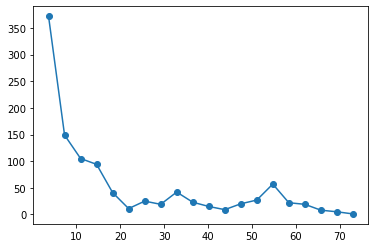

In [8]:
plt.scatter(bins[1][1:], bins[0])
plt.plot(bins[1][1:], bins[0]);

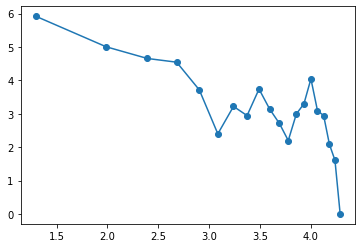

In [9]:
plt.scatter(np.log(bins[1][1:]), np.log(bins[0]))
plt.plot(np.log(bins[1][1:]), np.log(bins[0]));

### Fitting a line to estimate `alpha`

In [10]:
from sklearn.linear_model import LinearRegression

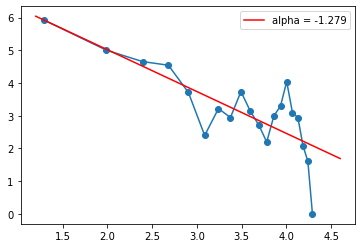

In [11]:

model = LinearRegression()
model.fit(np.log(bins[1][1:]).reshape(-1,1), np.log(bins[0]))
x = np.linspace(1.2, 4.6, 100).reshape(-1,1)
y = model.predict(x)


plt.scatter(np.log(bins[1][1:]), np.log(bins[0]))
plt.plot(np.log(bins[1][1:]), np.log(bins[0]))

plt.plot(x, y, c='r', label=f'alpha = {np.round(model.coef_[0], 3)}')
plt.legend();

# Home reading

"Scale-free networks are rare", Anna D. Broido, Aaron Clauset https://www.nature.com/articles/s41467-019-08746-5

# 2. Build graphs in 3 popular libraries

# 2.1 `networkx`

In [12]:
import networkx as nx

In [13]:
edges = [
    (1, 2),
    (1, 3),
    (2, 3),
    (4, 5),
    (4, 6),
    (5, 6),
    (1, 4),
]
df_edges = pd.DataFrame(data=edges, columns=['source', 'target'])

In [14]:
G = nx.from_pandas_edgelist(df_edges)

In [15]:
# dir(G)

In [16]:
adjacency = np.array(nx.adjacency_matrix(G).todense())
pos = nx.layout.fruchterman_reingold_layout(G)

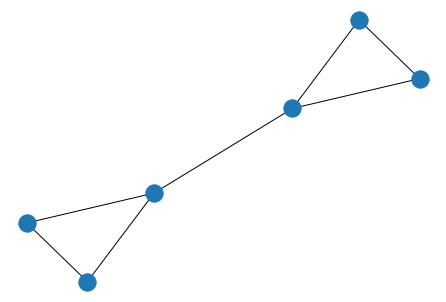

In [17]:
nx.draw(G, pos=pos)

# 2.2 `igraph`

In [18]:
from igraph import Graph, ADJ_MAX

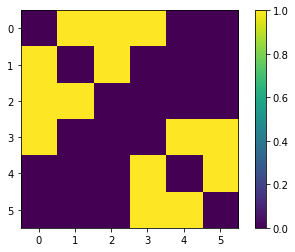

In [19]:
plt.imshow(adjacency)
plt.colorbar();

In [20]:
g0 = Graph.Weighted_Adjacency(
            adjacency.tolist(), mode=ADJ_MAX, attr='weight')

In [21]:
# dir(g0)

In [22]:
pos = g0.layout_fruchterman_reingold()
pos = dict(zip(range(1,7), pos.coords))

### `igraph` was originally designed for R language, so for plotting let's use `networkx` routines

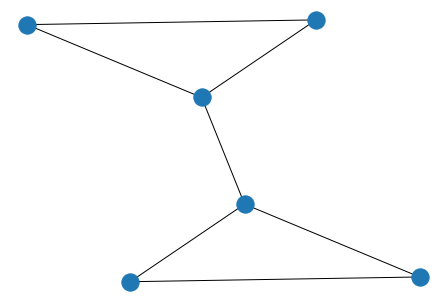

In [23]:
nx.draw(G, pos=pos)

# 2.3 `pytorch-geometric`

In [24]:
import torch
from torch_geometric.data import Data
import torch_geometric

In [25]:
# create edge index from nx graph

adj = nx.to_scipy_sparse_matrix(G).tocoo()
row = torch.from_numpy(adj.row.astype(np.int64)).to(torch.long)
col = torch.from_numpy(adj.col.astype(np.int64)).to(torch.long)
edge_index = torch.stack([row, col], dim=0)

In [26]:
# pytorch-geometric allow for features both on vertices and on edges
x = torch.tensor([[-1], [0], [1], [1], [-1], [0]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)

In [27]:
# dir(data)

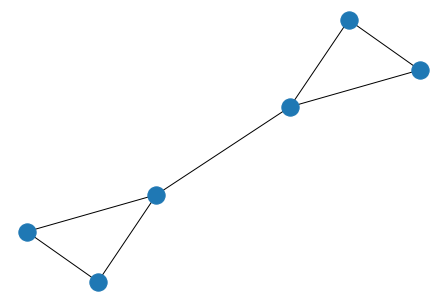

In [28]:
g = torch_geometric.utils.to_networkx(data, to_undirected=True)
nx.draw(g)

# 3. Домашнее задание

Визуализировать граф соавторств ИТИСа:
- выделить гигантскую компоненту связности
- визуализировать GCC используя любой метод укладки на выбор (методы igraph работают быстрее):
    - `dir(nx.layout)`
    - `[d for d in dir(igraph.Graph) if d.startswith('layout_')]`
- на изображении подписать 10 вершин (авторов) с наибольшей степенью вершины